# **Load DataSet from S3**

In [1]:
from urllib.parse import urlparse
import pandas as pd
import boto3

def parse_s3_uri(s3_uri: str):
    parsed = urlparse(s3_uri)
    bucket = parsed.netloc
    key = parsed.path.lstrip("/")
    return bucket, key

def load_airbnb_data_from_s3(s3_uri: str) -> pd.DataFrame:
    bucket, key = parse_s3_uri(s3_uri)
    s3_client = boto3.client("s3")
    obj = s3_client.get_object(Bucket=bucket, Key=key)
    df = pd.read_csv(obj["Body"])
    return df

s3_uri = "s3://hetvi-mlflow-bucket/airbnb/raw_data/AB_NYC_2019.csv"
df = load_airbnb_data_from_s3(s3_uri)
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **EDA**

In [2]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df['host_id'].value_counts().head(10)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [6]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
df.columns.to_list()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [9]:
df = df.drop(['id', 'name', 'host_name', 'last_review', 'host_id'], axis=1)

In [10]:
df.shape

(48895, 11)

In [11]:
df.columns.to_list()

['neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [12]:
# Count missing values per column
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])


reviews_per_month    10052
dtype: int64


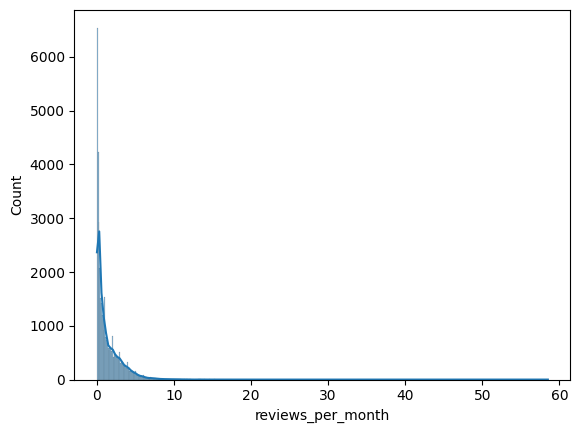

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of reviews_per_month
sns.histplot(df['reviews_per_month'], kde=True)
plt.show()

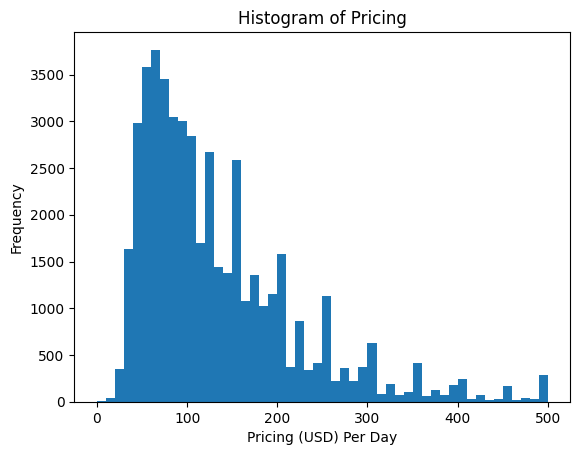

In [14]:
# visualize distribution of price (target variable)
plt.hist(df['price'], bins=50, range=(0, 500))
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

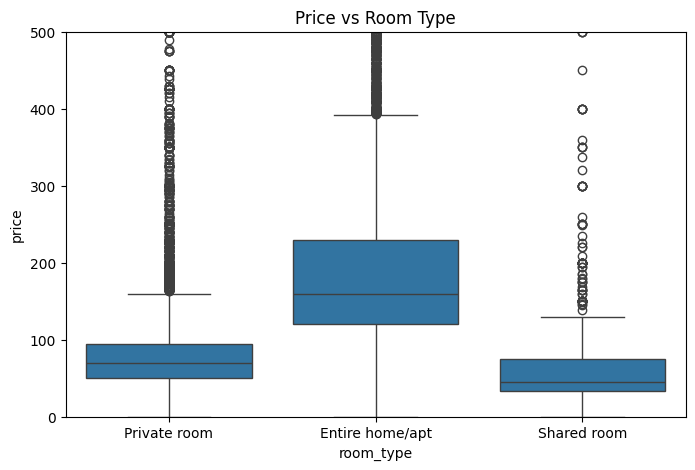

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Price vs Room Type")
plt.ylim(0, 500)  # zoom into realistic price range

plt.show()

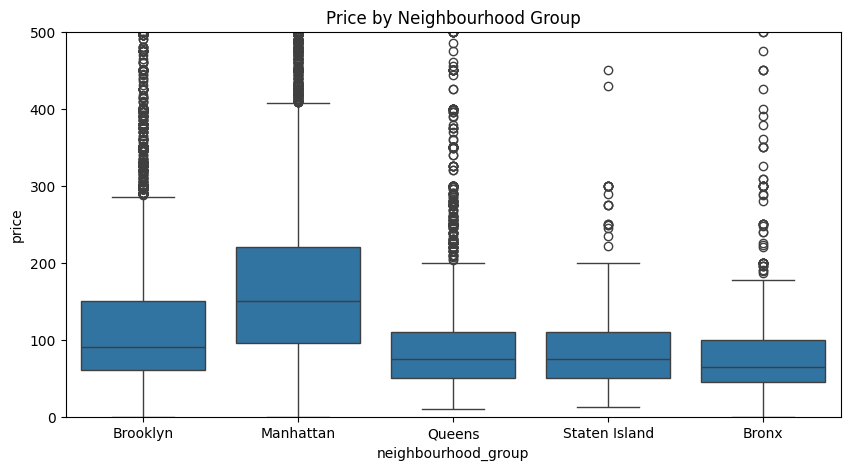

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title("Price by Neighbourhood Group")
plt.ylim(0, 500)  # zoom into realistic price range

plt.show()


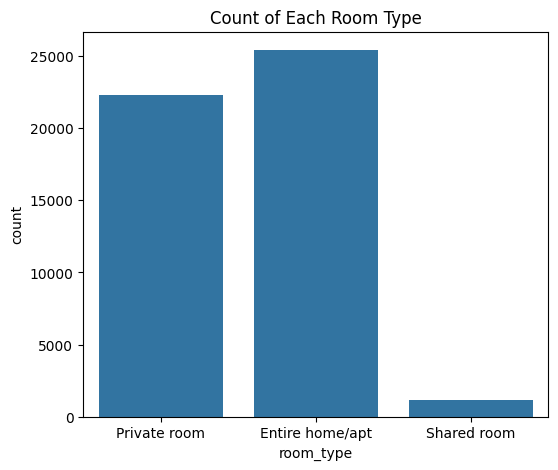

In [17]:
plt.figure(figsize=(6,5))
sns.countplot(x='room_type', data=df)
plt.title("Count of Each Room Type")
plt.show()


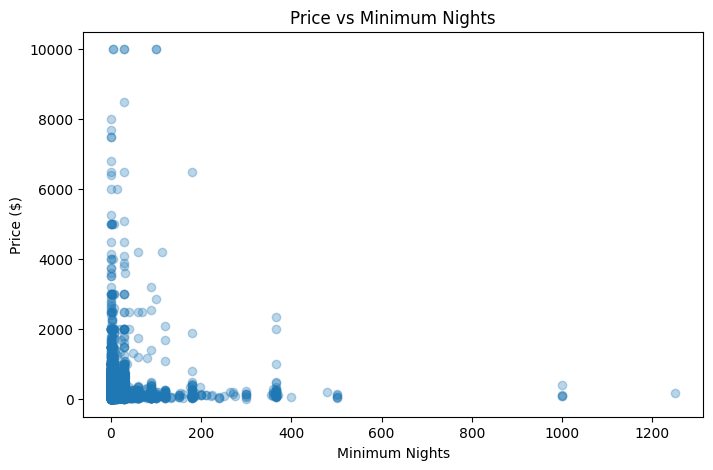

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['minimum_nights'], df['price'], alpha=0.3)
plt.xlabel("Minimum Nights")
plt.ylabel("Price ($)")
plt.title("Price vs Minimum Nights")
plt.show()


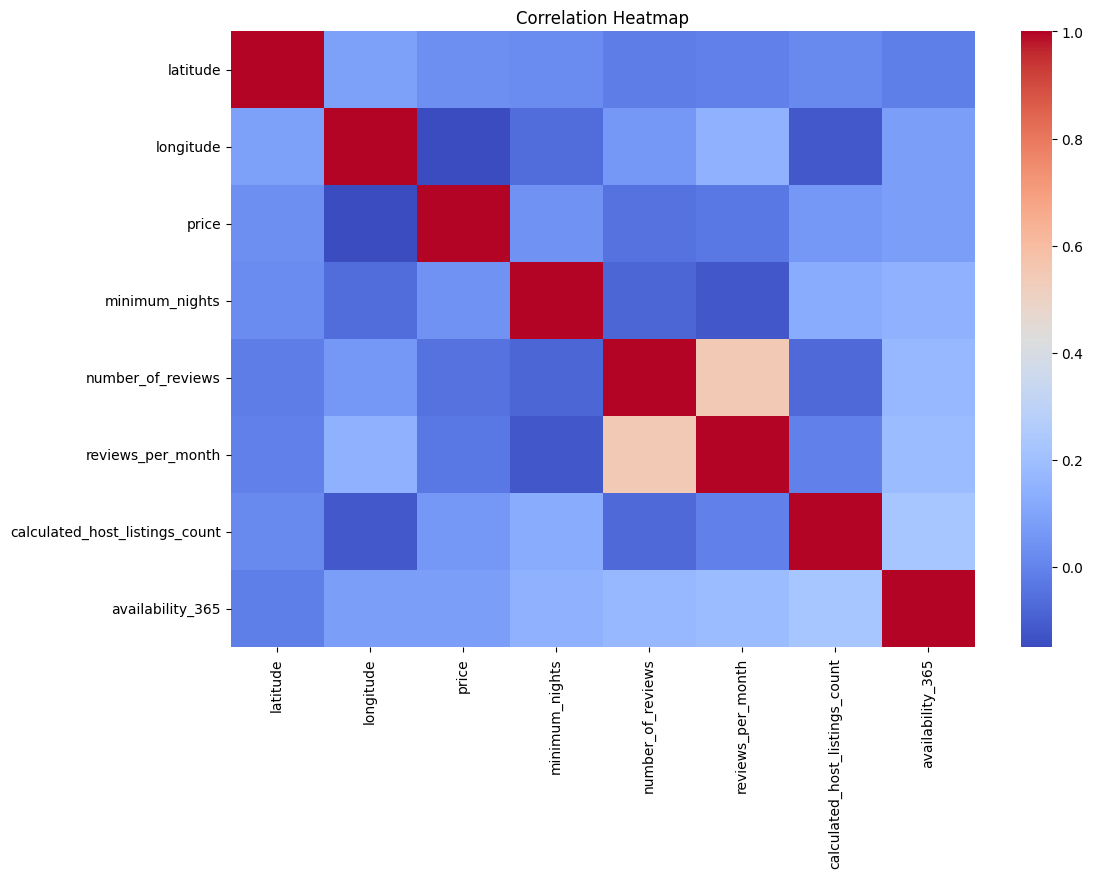

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


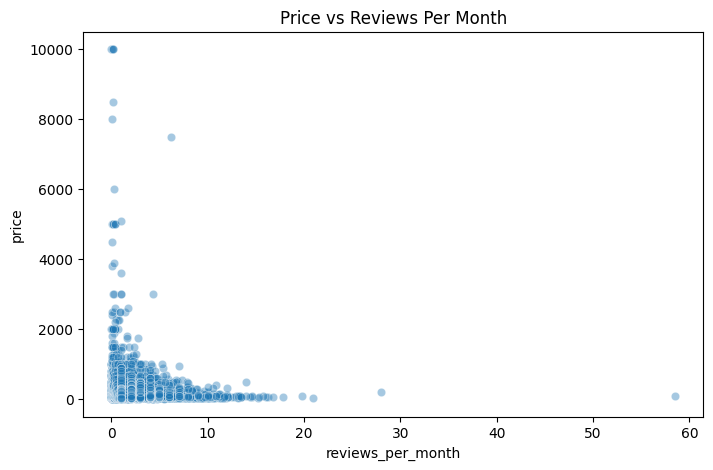

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='reviews_per_month', y='price', data=df, alpha=0.4)
plt.title("Price vs Reviews Per Month")
plt.show()


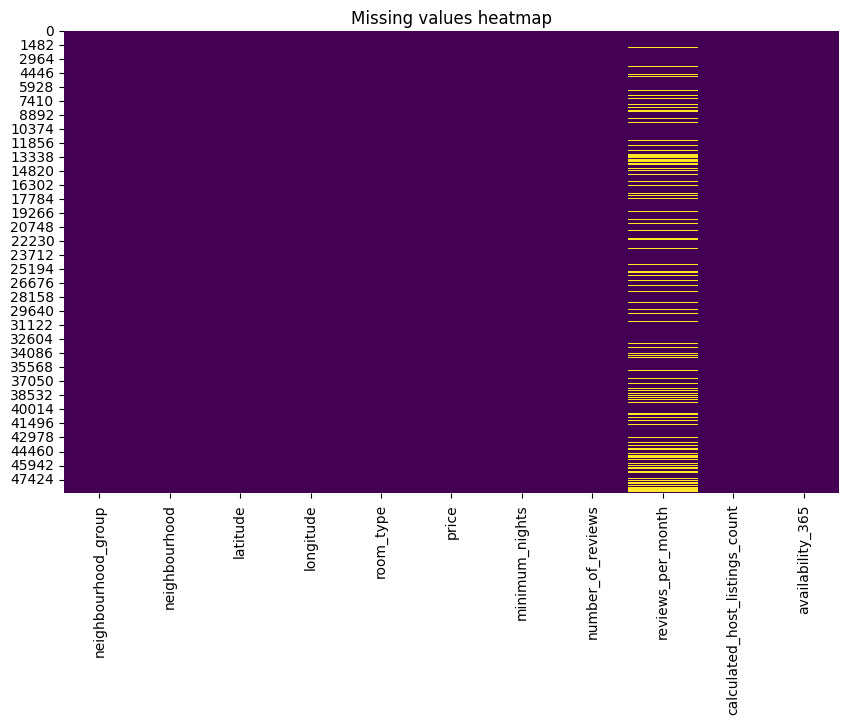

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing values heatmap")
plt.show()

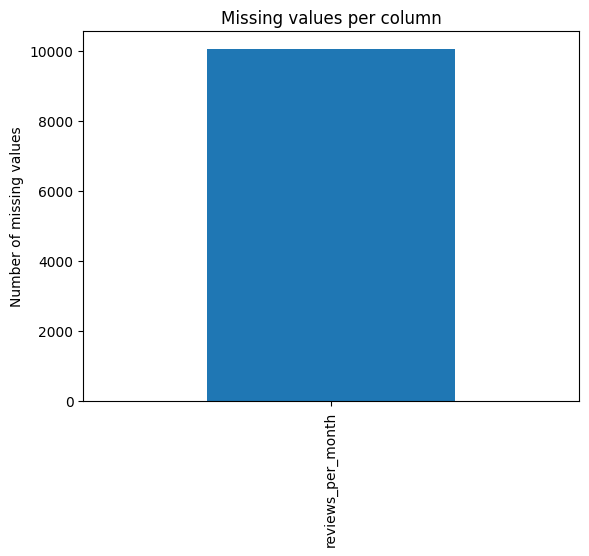

In [22]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts.plot(kind='bar')
plt.title("Missing values per column")
plt.ylabel("Number of missing values")
plt.show()


# **Data Preprocessing**

In [23]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


In [24]:
df['reviews_per_month'].isnull().sum()

np.int64(0)

In [25]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [26]:
df[df['price'] <= 0].shape


(11, 11)

In [27]:
df = df[df['price'] > 0].reset_index(drop=True)


In [28]:
df[df['price'] <= 0].shape


(0, 11)

In [29]:
df[df['minimum_nights'] < 1].shape


(0, 11)

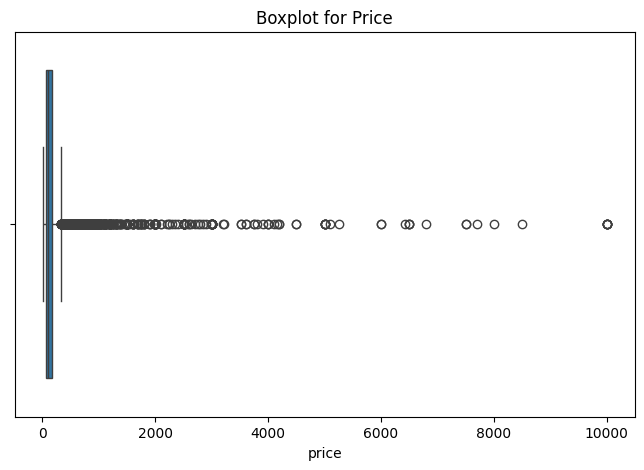

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'])
plt.title("Boxplot for Price")
plt.show()


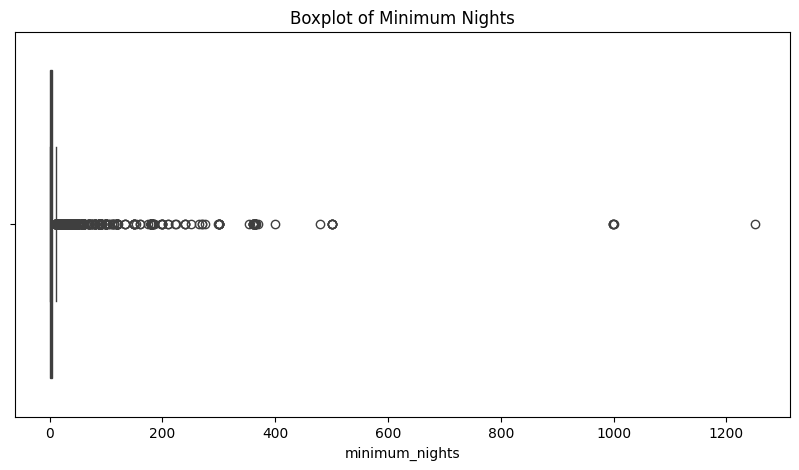

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


# Minimum nights boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=df['minimum_nights'])
plt.title("Boxplot of Minimum Nights")
plt.show()


In [32]:

# STEP 2 — Remove extreme upper outliers
price_upper = df['price'].quantile(0.95)
mn_upper = df['minimum_nights'].quantile(0.95)

df = df[(df['price'] <= price_upper) &
        (df['minimum_nights'] <= mn_upper)].reset_index(drop=True)

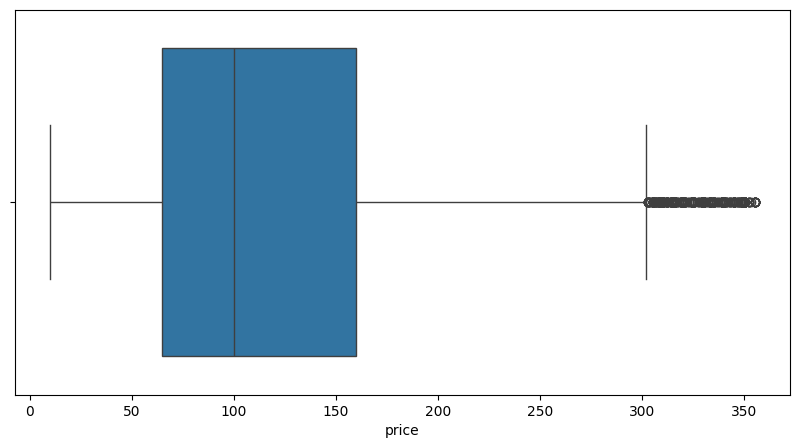

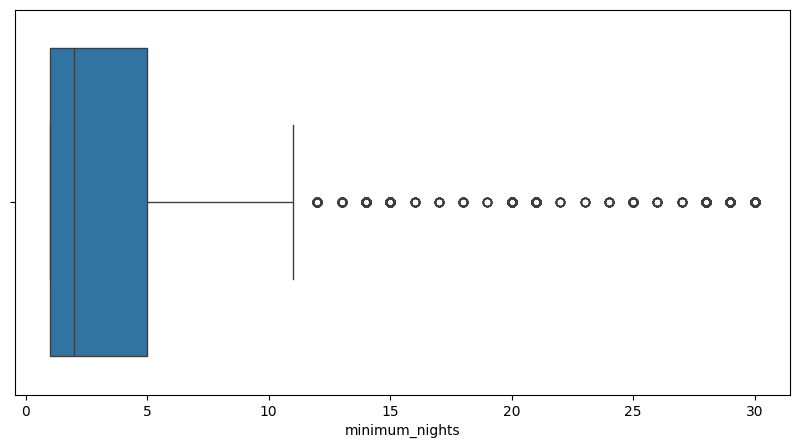

In [33]:
# STEP 3 — Plot (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['minimum_nights'])
plt.show()

In [34]:
df[(df['availability_365'] < 0) | (df['availability_365'] > 365)]


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [35]:
df[df['reviews_per_month'] < 0]


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [36]:
df[df['number_of_reviews'] < 0]


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


# **Feature Engineering**

In [37]:
df['reviews_ratio'] = df['reviews_per_month'] / (df['number_of_reviews'] + 1)
df['is_superhost_like'] = (df['calculated_host_listings_count'] > 10).astype(int)
def categorize(avail):
    if avail == 0:
        return "fully_booked"
    elif avail < 100:
        return "high_demand"
    elif avail < 250:
        return "medium_demand"
    else:
        return "low_demand"

df['availability_category'] = df['availability_365'].apply(categorize)


In [38]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews_ratio,is_superhost_like,availability_category
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0.021000,0,low_demand
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,0.008261,0,low_demand
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,0.000000,0,low_demand
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0.017122,0,medium_demand
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,0.010000,0,fully_booked


In [39]:
num_cols = ['latitude', 'longitude', 'minimum_nights',
            'number_of_reviews', 'reviews_per_month',
            'calculated_host_listings_count', 'availability_365',
            'reviews_ratio', 'is_superhost_like']

# Categorical columns
cat_cols = [
    'neighbourhood_group',
    'neighbourhood',
    'room_type',
    'availability_category',
    # 'host_experience_level'
]




**Data Splitting for Modelling**

In [40]:
y = df['price']
X = df.drop(columns=['price'])

In [41]:
X.head()
X.shape, y.shape


((45748, 13), (45748,))

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
for col in cat_cols:
    X_train[col] = X_train[col].fillna('Unknown')
    X_test[col] = X_test[col].fillna('Unknown')


In [44]:
X_train[cat_cols].isnull().sum()
X_test[cat_cols].isnull().sum()


neighbourhood_group      0
neighbourhood            0
room_type                0
availability_category    0
dtype: int64

**Encoding categorical features**

In [45]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit only on TRAIN categorical data
ohe.fit(X_train[cat_cols])


,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [46]:
X_train.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews_ratio,is_superhost_like,availability_category
28700,Brooklyn,Bushwick,40.69322,-73.91268,Private room,1,12,0.76,2,47,0.058462,0,high_demand
39485,Manhattan,Financial District,40.70604,-74.01216,Entire home/apt,2,7,2.59,327,294,0.323750,1,low_demand
39699,Manhattan,East Village,40.72412,-73.98283,Entire home/apt,1,16,5.05,1,70,0.297059,0,high_demand
36881,Manhattan,East Village,40.73009,-73.98884,Entire home/apt,4,0,0.00,1,0,0.000000,0,fully_booked
309,Brooklyn,Greenpoint,40.73776,-73.95327,Private room,3,8,0.09,28,60,0.010000,1,high_demand


In [47]:
X_train_cat = ohe.transform(X_train[cat_cols])
X_test_cat  = ohe.transform(X_test[cat_cols])


In [48]:
X_train_cat

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(36598, 229))

In [49]:
import pandas as pd

X_train_cat_df = pd.DataFrame(X_train_cat, columns=ohe.get_feature_names_out(cat_cols))
X_test_cat_df  = pd.DataFrame(X_test_cat, columns=ohe.get_feature_names_out(cat_cols))

# Important: align index with X_train and X_test
X_train_cat_df.index = X_train.index
X_test_cat_df.index = X_test.index


In [50]:
X_train_final = pd.concat([X_train[num_cols], X_train_cat_df], axis=1)
X_test_final  = pd.concat([X_test[num_cols], X_test_cat_df], axis=1)


In [51]:
X_train_final.shape
X_train_final.head()


,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews_ratio,is_superhost_like,neighbourhood_group_Bronx,...,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,availability_category_fully_booked,availability_category_high_demand,availability_category_low_demand,availability_category_medium_demand
28700,40.69322,-73.91268,1,12,0.76,2,47,0.058462,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
39485,40.70604,-74.01216,2,7,2.59,327,294,0.323750,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
39699,40.72412,-73.98283,1,16,5.05,1,70,0.297059,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
36881,40.73009,-73.98884,4,0,0.00,1,0,0.000000,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
309,40.73776,-73.95327,3,8,0.09,28,60,0.010000,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# **Data Modelling**

Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


rf_params = {
    "n_estimators":200,
    "random_state":42,
    "n_jobs":-1
}

# Create model
rf = RandomForestRegressor(**rf_params)

# Train
rf.fit(X_train_final, y_train)

# Predict
rf_preds = rf.predict(X_test_final)

# Evaluate
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)


Random Forest MAE: 33.5679397996357
Random Forest RMSE: 47.55063621708217


Linear Regression

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_final[num_cols])
X_train_final[num_cols] = scaler.transform(X_train_final[num_cols])
X_test_final[num_cols] = scaler.transform(X_test_final[num_cols])


In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_final, y_train)

lr_preds = lr.predict(X_test_final)


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lr_mae = mean_absolute_error(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))

print("MAE:", lr_mae)
print("RMSE:", lr_rmse)


MAE: 35.97812066020037
RMSE: 50.19182852134958


Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

dt_params = {
    "random_state": 42
}
dt = DecisionTreeRegressor(**dt_params)
dt.fit(X_train_final, y_train)

dt_preds = dt.predict(X_test_final)

dt_mae = mean_absolute_error(y_test, dt_preds)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_preds))

print("Decision Tree MAE:", dt_mae)
print("Decision Tree RMSE:", dt_rmse)


Decision Tree MAE: 46.46983606557377
Decision Tree RMSE: 67.42919135652255


XGBoost

In [56]:
# If not installed:
# pip install xgboost

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


xgb_params = {
    "n_estimators":300,        # number of trees
    "learning_rate":0.1,      # step size
    "max_depth":6,            # tree depth
    "subsample":0.8,          # row sampling
    "colsample_bytree": 0.8,   # column sampling
    "random_state":42,
    "objective":"reg:squarederror"
}
# Create XGBoost model
xgb_model = XGBRegressor(**xgb_params)

# Train
xgb_model.fit(X_train_final, y_train)

# Predict
xgb_preds = xgb_model.predict(X_test_final)

# Evaluate
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

print("XGBoost MAE:", xgb_mae)
print("XGBoost RMSE:", xgb_rmse)


XGBoost MAE: 33.046077728271484
XGBoost RMSE: 47.07744824024025


# **Model Evaluation**

In [57]:
import pandas as pd

# Create comparison table
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "XGBoost"
    ],
    "MAE": [
        lr_mae,
        dt_mae,
        rf_mae,
        xgb_mae
    ],
    "RMSE": [
        lr_rmse,
        dt_rmse,
        rf_rmse,
        xgb_rmse
    ]
})

print(results)


               Model        MAE       RMSE
0  Linear Regression  35.978121  50.191829
1      Decision Tree  46.469836  67.429191
2      Random Forest  33.567940  47.550636
3            XGBoost  33.046078  47.077448


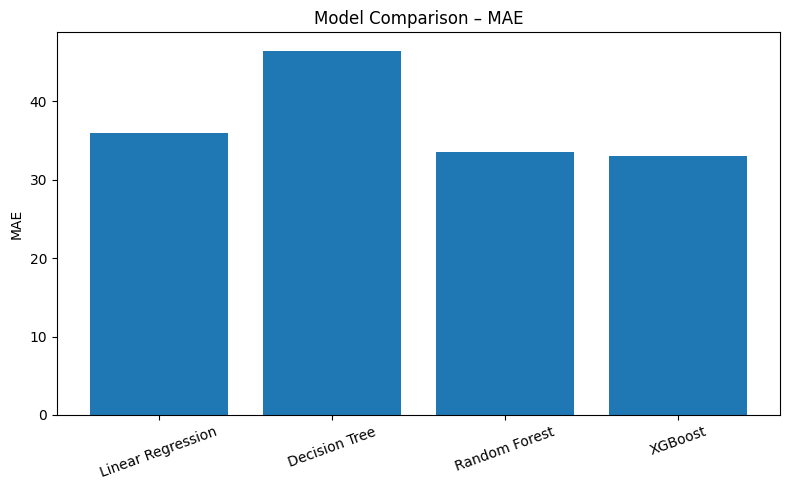

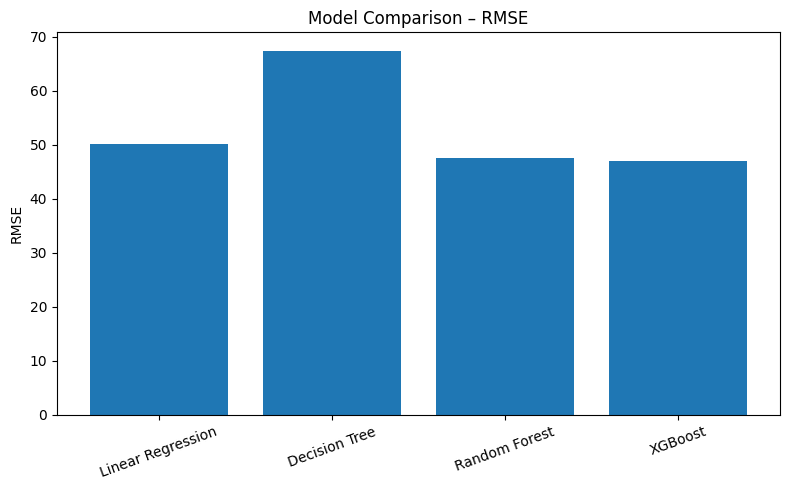

In [58]:
import matplotlib.pyplot as plt
import numpy as np

models = results["Model"]
mae_values = results["MAE"]
rmse_values = results["RMSE"]

x = np.arange(len(models))  # positions
width = 0.35  # bar width

# MAE bar plot
plt.figure(figsize=(8,5))
plt.bar(x, mae_values)
plt.xticks(x, models, rotation=20)
plt.ylabel("MAE")
plt.title("Model Comparison – MAE")
plt.tight_layout()
plt.show()

# RMSE bar plot
plt.figure(figsize=(8,5))
plt.bar(x, rmse_values)
plt.xticks(x, models, rotation=20)
plt.ylabel("RMSE")
plt.title("Model Comparison – RMSE")
plt.tight_layout()
plt.show()


# **Feature Importance**

Top 20 important features:
                                     feature  importance
231                room_type_Entire home/apt    0.202150
11             neighbourhood_group_Manhattan    0.120007
232                   room_type_Private room    0.068777
233                    room_type_Shared room    0.055256
225               neighbourhood_Williamsburg    0.022840
140                    neighbourhood_Midtown    0.012014
1                                  longitude    0.011813
88                    neighbourhood_Flatbush    0.011690
213            neighbourhood_Upper East Side    0.010213
209                    neighbourhood_Tribeca    0.009132
0                                   latitude    0.007196
236         availability_category_low_demand    0.007168
12                neighbourhood_group_Queens    0.006440
6                           availability_365    0.005903
5             calculated_host_listings_count    0.005768
35                neighbourhood_Breezy Point    0.005720
2   

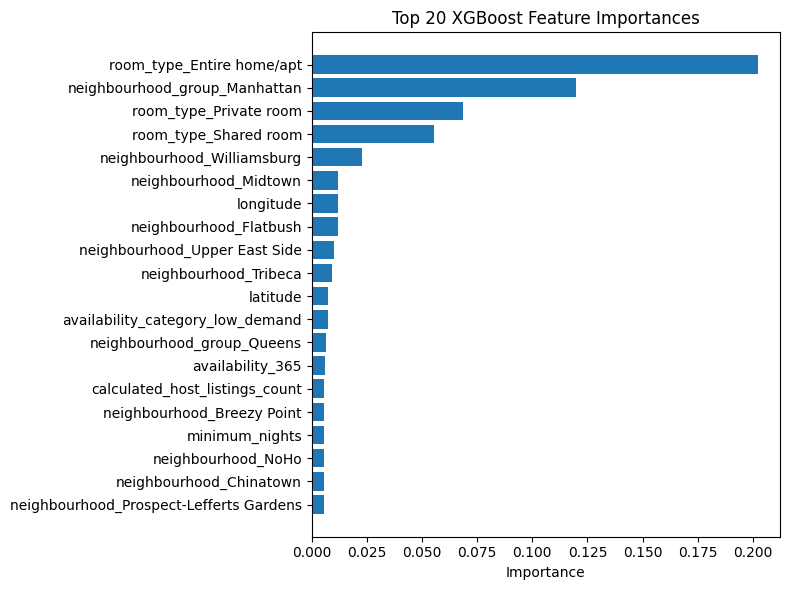

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Get feature importances from your trained XGBoost model
importances = xgb_model.feature_importances_
feature_names = X_train_final.columns

# 2) Put into a DataFrame and sort
fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

# 3) See top 20 in table form
print("Top 20 important features:")
print(fi_df.head(20))

# 4) Plot top 20 as horizontal bar chart
top_n = 20
top_features = fi_df.head(top_n)

plt.figure(figsize=(8, 6))
plt.barh(top_features["feature"], top_features["importance"])
plt.gca().invert_yaxis()  # so most important is at the top
plt.xlabel("Importance")
plt.title("Top 20 XGBoost Feature Importances")
plt.tight_layout()
plt.show()


# **MLFlow Integration**

In [60]:
import mlflow
import mlflow.sklearn


In [61]:
from pathlib import Path
import mlflow

project_root = Path(r"C:\Users\Admin\Downloads\git practice\staywise-airbnb-pricing-mlflow").resolve()
tracking_path = project_root / "mlruns"
tracking_path.mkdir(parents=True, exist_ok=True)

# Use a file:// URI — Path.as_posix() gives forward slashes.
mlflow.set_tracking_uri(f"file:///{tracking_path.as_posix()}")
mlflow.set_experiment("staywise_airbnb_pricing")


c:\Users\Admin\Downloads\git practice\staywise-airbnb-pricing-mlflow\venv\lib\site-packages\mlflow\tracking\_tracking_service\utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
2025/11/21 12:14:57 INFO mlflow.tracking.fluent: Experiment with name 'staywise_airbnb_pricing' does not exist. Creating a new experiment.


<Experiment: artifact_location=('file:///C:/Users/Admin/Downloads/git '
 'practice/staywise-airbnb-pricing-mlflow/mlruns/572012823641833791'), creation_time=1763745297759, experiment_id='572012823641833791', last_update_time=1763745297759, lifecycle_stage='active', name='staywise_airbnb_pricing', tags={}>

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import mlflow
import mlflow.sklearn
import os

def plot_and_save_true_vs_pred(y_true, y_pred, filename):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.xlabel("True Price")
    plt.ylabel("Predicted Price")
    plt.title("True vs Predicted Price")
    # Diagonal line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val])
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

def plot_and_save_residuals(y_true, y_pred, filename):
    residuals = y_true - y_pred
    plt.figure(figsize=(6, 4))
    plt.hist(residuals, bins=50)
    plt.xlabel("Residual (True - Predicted)")
    plt.ylabel("Count")
    plt.title("Residuals Distribution")
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

def plot_and_save_feature_importance(model, feature_names, filename, top_n=20):
    # Works for tree models that have feature_importances_
    importances = model.feature_importances_
    idx = np.argsort(importances)[::-1][:top_n]
    top_features = np.array(feature_names)[idx]
    top_importances = importances[idx]

    plt.figure(figsize=(8, 6))
    plt.barh(range(len(top_features)), top_importances[::-1])
    plt.yticks(range(len(top_features)), top_features[::-1])
    plt.xlabel("Importance")
    plt.title(f"Top {top_n} Feature Importances")
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()


**Random Forest**

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import mlflow
import mlflow.sklearn
import os

with mlflow.start_run(run_name="RandomForest_v1"):
    # 5) Log params & metrics to MLflow
    mlflow.log_params(rf_params)
    mlflow.log_metric("MAE", rf_mae)
    mlflow.log_metric("RMSE", rf_rmse)

    # 6) Create plots and save locally
    os.makedirs("plots", exist_ok=True)
    tvp_path = "plots/rf_true_vs_pred.png"
    res_path = "plots/rf_residuals.png"
    fi_path  = "plots/rf_feature_importance.png"

    plot_and_save_true_vs_pred(y_test, rf_preds, tvp_path)
    plot_and_save_residuals(y_test, rf_preds, res_path)

    # For feature names, use columns of X_train_final
    feature_names = X_train_final.columns
    plot_and_save_feature_importance(rf, feature_names, fi_path)

    # 7) Log artifacts to MLflow
    mlflow.log_artifact(tvp_path, artifact_path="plots")
    mlflow.log_artifact(res_path, artifact_path="plots")
    mlflow.log_artifact(fi_path,  artifact_path="plots")

    mlflow.sklearn.log_model(rf, artifact_path="model")


2025/11/21 12:14:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/21 12:15:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


**Linear Regression**

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import mlflow
import mlflow.sklearn
import os

with mlflow.start_run(run_name="LinearRegression_v1"):
    # 5) Log parameters & metrics
    mlflow.log_param("model_type", "LinearRegression")
    mlflow.log_metric("MAE", lr_mae)
    mlflow.log_metric("RMSE", lr_rmse)

    # 6) Create plots and save locally
    os.makedirs("plots", exist_ok=True)
    tvp_path = "plots/lr_true_vs_pred.png"
    res_path = "plots/lr_residuals.png"

    plot_and_save_true_vs_pred(y_test, lr_preds, tvp_path)
    plot_and_save_residuals(y_test, lr_preds, res_path)

    # 7) Log artifacts to MLflow
    mlflow.log_artifact(tvp_path, artifact_path="plots")
    mlflow.log_artifact(res_path, artifact_path="plots")

    # 8) Log the model itself
    mlflow.sklearn.log_model(lr, artifact_path="model")


2025/11/21 12:15:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/21 12:15:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


**Decision Tree**

In [65]:
import mlflow
import mlflow.sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import os

with mlflow.start_run(run_name="DecisionTree_v1"):
    # 5) Log parameters & metrics
    mlflow.log_params(dt_params)
    mlflow.log_metric("MAE", dt_mae)
    mlflow.log_metric("RMSE", dt_rmse)

    # 6) Create plots and save locally
    os.makedirs("plots", exist_ok=True)
    tvp_path = "plots/dt_true_vs_pred.png"
    res_path = "plots/dt_residuals.png"
    fi_path  = "plots/dt_feature_importance.png"

    plot_and_save_true_vs_pred(y_test, dt_preds, tvp_path)
    plot_and_save_residuals(y_test, dt_preds, res_path)

    feature_names = X_train_final.columns
    plot_and_save_feature_importance(dt, feature_names, fi_path)

    # 7) Log artifacts to MLflow
    mlflow.log_artifact(tvp_path, artifact_path="plots")
    mlflow.log_artifact(res_path, artifact_path="plots")
    mlflow.log_artifact(fi_path,  artifact_path="plots")

    # 8) Log the model
    mlflow.sklearn.log_model(dt, artifact_path="model")


2025/11/21 12:15:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/21 12:15:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


**XGBoost**

In [66]:
from xgboost import XGBRegressor
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import os

with mlflow.start_run(run_name="XGBoost_v1"):
    # 5) Log parameters
    mlflow.log_params(xgb_params)

    # 6) Log metrics
    mlflow.log_metric("MAE", xgb_mae)
    mlflow.log_metric("RMSE", xgb_rmse)

    # 7) Create plots and save locally
    os.makedirs("plots", exist_ok=True)
    tvp_path = "plots/xgb_true_vs_pred.png"
    res_path = "plots/xgb_residuals.png"
    fi_path  = "plots/xgb_feature_importance.png"

    plot_and_save_true_vs_pred(y_test, xgb_preds, tvp_path)
    plot_and_save_residuals(y_test, xgb_preds, res_path)

    feature_names = X_train_final.columns
    plot_and_save_feature_importance(xgb_model, feature_names, fi_path)

    # 8) Log artifacts
    mlflow.log_artifact(tvp_path, artifact_path="plots")
    mlflow.log_artifact(res_path, artifact_path="plots")
    mlflow.log_artifact(fi_path,  artifact_path="plots")

    # 9) Log the model
    mlflow.sklearn.log_model(xgb_model, artifact_path="model")


2025/11/21 12:15:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/21 12:15:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [68]:
import mlflow

run_id = "your-best-run-id"
model_uri = f"runs:/5ffaf2bbdef746f793a0068889a70c93/model"   # "model" must match the name used in log_model()

mlflow.register_model(
    model_uri=model_uri,
    name="airbnb_price_predictor"
)


Registered model 'airbnb_price_predictor' already exists. Creating a new version of this model...
2025/11/21 12:18:44 WARNING mlflow.tracking._model_registry.fluent: Run with id 5ffaf2bbdef746f793a0068889a70c93 has no artifacts at artifact path 'model', registering model based on models:/m-d2bb8eb86c094771b591c79637a20dfc instead
Created version '1' of model 'airbnb_price_predictor'.


<ModelVersion: aliases=[], creation_timestamp=1763745524389, current_stage='None', deployment_job_state=None, description=None, last_updated_timestamp=1763745524389, metrics=[<Metric: dataset_digest=None, dataset_name=None, key='MAE', model_id='m-d2bb8eb86c094771b591c79637a20dfc', run_id='5ffaf2bbdef746f793a0068889a70c93', step=0, timestamp=1763745352866, value=33.046077728271484>,
 <Metric: dataset_digest=None, dataset_name=None, key='RMSE', model_id='m-d2bb8eb86c094771b591c79637a20dfc', run_id='5ffaf2bbdef746f793a0068889a70c93', step=0, timestamp=1763745352869, value=47.07744824024025>], model_id='m-d2bb8eb86c094771b591c79637a20dfc', name='airbnb_price_predictor', params={'colsample_bytree': '0.8',
 'learning_rate': '0.1',
 'max_depth': '6',
 'n_estimators': '300',
 'objective': 'reg:squarederror',
 'random_state': '42',
 'subsample': '0.8'}, run_id='5ffaf2bbdef746f793a0068889a70c93', run_link=None, source='models:/m-d2bb8eb86c094771b591c79637a20dfc', status='READY', status_message=N